@Importações de Todas Bibliotecas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Lendo o arquivo CSV com a biblioteca Pandas:

In [4]:
df = pd.read_csv('amazon.csv', encoding='latin-1')

In [5]:
df.duplicated().sum()

32

Como podemos ver, existem 32 valores duplicados, então vamos removê-los.


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6422 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6422 non-null   int64  
 1   state   6422 non-null   object 
 2   month   6422 non-null   object 
 3   number  6422 non-null   float64
 4   date    6422 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 301.0+ KB


*Buscando informações dos dados*:
- São 6.422 registros
- Colunas de ano, estado, mês, número e data

Os números no Brasil usam ponto (.) como separador de milhar, mas o Python pode interpretá-los como separadores decimais. Para corrigir isso, podemos converter a coluna number para str, remover os pontos e depois transformá-la de volta para um número (int).

In [11]:
df['number'] = df['number'].astype(str).str.replace('.', '', regex=False)

In [12]:
df['number'] = df['number'].astype(str).apply(lambda x: x[:-1] if x.endswith('0') else x)

In [13]:
df['number'] = df['number'].astype(int)

In [14]:
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128,2012-01-01
6450,2013,Tocantins,Dezembro,85,2013-01-01
6451,2014,Tocantins,Dezembro,223,2014-01-01
6452,2015,Tocantins,Dezembro,373,2015-01-01
6453,2016,Tocantins,Dezembro,119,2016-01-01


In [15]:
df.drop(['date'],axis=1,inplace=True)

In [16]:
df

,year,state,month,number
0,1998,Acre,Janeiro,0
1,1999,Acre,Janeiro,0
2,2000,Acre,Janeiro,0
3,2001,Acre,Janeiro,0
4,2002,Acre,Janeiro,0
...,...,...,...,...
6449,2012,Tocantins,Dezembro,128
6450,2013,Tocantins,Dezembro,85
6451,2014,Tocantins,Dezembro,223
6452,2015,Tocantins,Dezembro,373


Removendo warnings indesejados

In [18]:
import warnings
warnings.filterwarnings('ignore')

Organizando a ordem dos meses, para poder agrupar corretamente a soma

In [20]:
month_order = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 
               'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

soma_mes = df.groupby('month')['number'].mean().reset_index()

soma_mes['month'] = pd.Categorical(soma_mes['month'], categories=month_order, ordered=True)


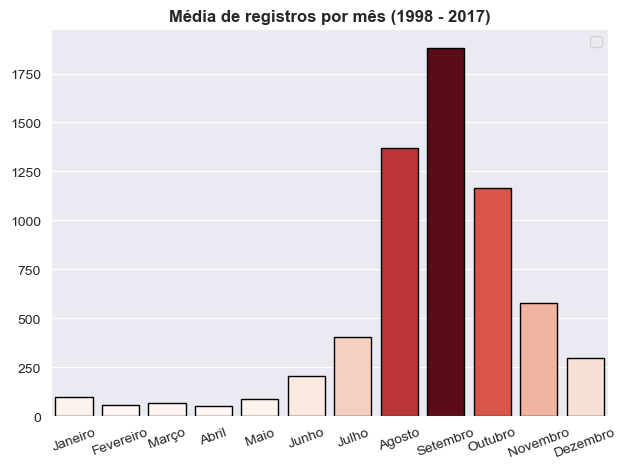

In [81]:
sns.set_style('darkgrid')
sns.barplot(x='month', y='number', data=soma_mes, palette='Reds',hue='number',edgecolor='black')
plt.xticks(rotation=20)

plt.xlabel('')
plt.ylabel('')
plt.title('Média de registros por mês (1998 - 2017)',fontweight='bold')
plt.tight_layout()
plt.legend(labels='')
plt.savefig('C:/Users/zoomg/Downloads/analise-amazon/graficos/mediames.png')

In [22]:
df['number'].max()

25963

In [23]:
df[df['number']==25963] 

,year,state,month,number
2560,2007,Mato Grosso,Setembro,25963


In [24]:
df_decade1 = df[(df['year'] >= 1998) & (df['year'] <= 2007)]

In [25]:
df_decade2 = df[(df['year'] >= 2008) & (df['year'] <= 2017)]

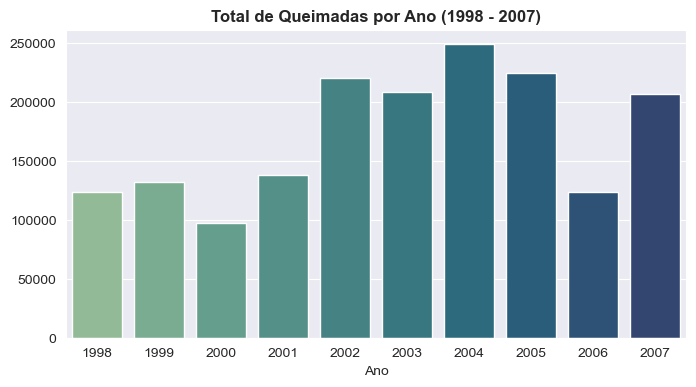

In [87]:
df_sum_year = df_decade1.groupby('year')['number'].sum().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(x='year', y='number', data=df_sum_year, palette='crest')

plt.title('Total de Queimadas por Ano (1998 - 2007)', fontweight='bold')
plt.xlabel('Ano')
plt.ylabel('')
plt.savefig('C:/Users/zoomg/Downloads/analise-amazon/graficos/decada1.png')

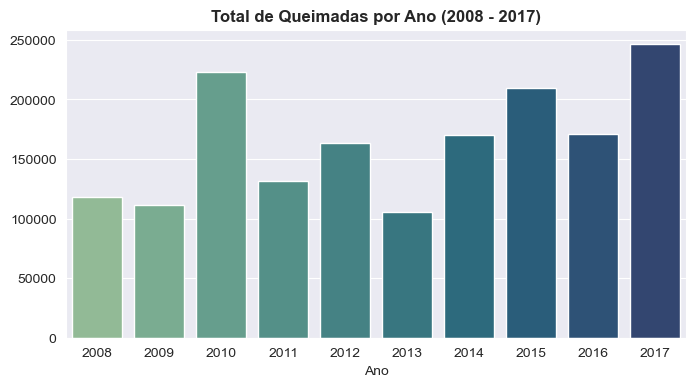

In [85]:
df_sum_year2 = df_decade2.groupby('year')['number'].sum().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(x='year', y='number', data=df_sum_year2, palette='crest')

plt.title('Total de Queimadas por Ano (2008 - 2017)', fontweight='bold')
plt.xlabel('Ano')
plt.ylabel('')
plt.savefig('C:/Users/zoomg/Downloads/analise-amazon/graficos/decada2.png')

In [28]:
fogo_estados = df.groupby(by = 'state')['number'].sum().sort_values(ascending = False).head(15).reset_index()
fogo_estados = fogo_estados.sort_values(by = 'number', ascending = False)

fogo_estados

,state,number
0,Mato Grosso,767890
1,Pará,577841
2,Maranhao,375279
3,Bahia,226979
4,Tocantins,212432
5,Rondonia,185387
6,Piau,178707
7,Minas Gerais,169223
8,Amazonas,117467
9,Goias,111970


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

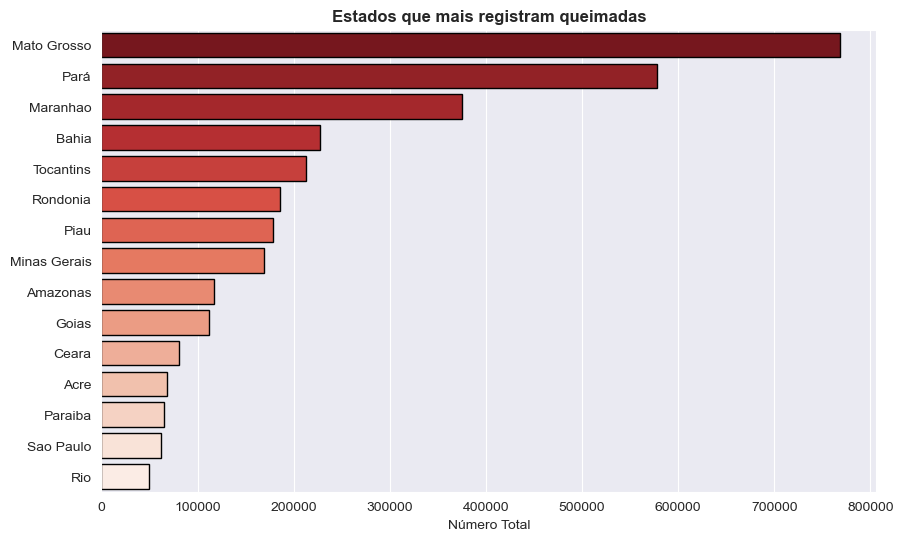

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(x='number', y='state', data=fogo_estados, palette = 'Reds_r', edgecolor='black')

plt.title('Estados que mais registram queimadas', fontweight='bold')
plt.ylabel('')
plt.xlabel('Número Total')
plt.tight_layout
plt.savefig('C:/Users/zoomg/Downloads/analise-amazon/graficos/mediames.png')

In [30]:
soma_mes2 = df.groupby(['month','year'])['number'].sum().reset_index()

soma_mes['month'] = pd.Categorical(soma_mes['month'], categories=month_order, ordered=True)

In [31]:
soma_mes2

,month,year,number
0,Abril,1998,0
1,Abril,1999,717
2,Abril,2000,537
3,Abril,2001,1081
4,Abril,2002,1682
...,...,...,...
234,Setembro,2013,25069
235,Setembro,2014,37225
236,Setembro,2015,67124
237,Setembro,2016,35978


In [32]:
soma_mes2['month'] = pd.Categorical(soma_mes2['month'], categories=month_order, ordered=True)

In [33]:
soma_mes2.pivot_table(values='number',index='month',columns='year')

year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
month,,,,,,,,,,,,,,,,,,,,
Janeiro,0.0,1081.0,778.0,547.0,1654.0,5091.0,2705.0,4990.0,3255.0,3055.0,2125.0,2848.0,2851.0,1416.0,2491.0,2045.0,2633.0,4635.0,5979.0,2342.0
Fevereiro,0.0,1284.0,561.0,1059.0,1570.0,2398.0,1255.0,2153.0,1666.0,1751.0,1275.0,1140.0,2386.0,973.0,1436.0,1578.0,1547.0,2309.0,3202.0,1400.0
Março,0.0,667.0,848.0,1268.0,1679.0,2749.0,2040.0,1706.0,1766.0,2136.0,1239.0,1392.0,2417.0,937.0,2058.0,1969.0,2224.0,2202.0,3796.0,2017.0
Abril,0.0,717.0,537.0,1081.0,1682.0,2677.0,1332.0,1011.0,792.0,415.0,1253.0,1077.0,2200.0,1152.0,2193.0,1372.0,2358.0,2573.0,2379.0,1559.0
Maio,0.0,1812.0,2097.0,2086.0,3818.0,1747.0,3535.0,3210.0,808.0,1284.0,553.0,2593.0,3497.0,1985.0,3240.0,2165.0,3189.0,2384.0,3568.0,2506.0
Junho,3551.0,3632.0,6275.0,8420.0,10839.0,6506.0,14262.0,5811.0,1968.0,3956.0,1287.0,2962.0,3642.0,4578.0,5890.0,3898.0,6483.0,4775.0,6339.0,6318.0
Julho,8066.0,8756.0,4739.0,6490.0,13751.0,11804.0,23809.0,15663.0,5722.0,6190.0,4507.0,6599.0,16646.0,8524.0,13507.0,5843.0,10801.0,8752.0,19141.0,18303.0
Agosto,35549.0,38415.0,22202.0,31887.0,55099.0,37382.0,48038.0,39912.0,29443.0,66837.0,14528.0,15534.0,58985.0,22477.0,42422.0,16143.0,41928.0,37167.0,37408.0,49485.0
Setembro,41968.0,36913.0,22319.0,32193.0,49566.0,55913.0,70531.0,74574.0,41264.0,78299.0,35836.0,25002.0,75679.0,50301.0,49183.0,25069.0,37225.0,67124.0,35978.0,110988.0


In [34]:
pvmes = soma_mes2.pivot_table(values='number',index='month',columns='year')
pvmes.fillna(0, inplace=True)

Text(0.5, 1.0, 'Número de Focos de Queimada ao longo dos anos')

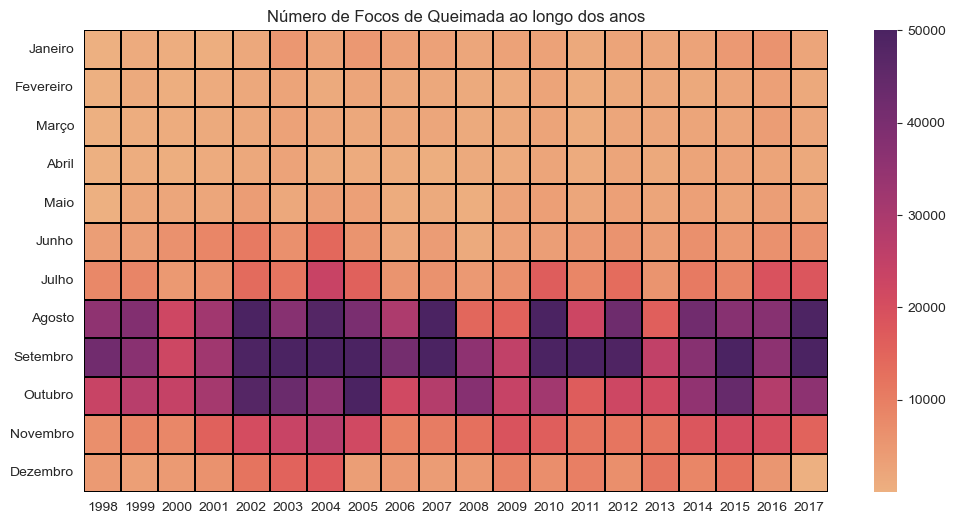

In [35]:
plt.figure(figsize=(12,6))
sns.heatmap(pvmes,cmap='flare',linecolor='black',linewidths=0.1,vmin=1,vmax=50000)
plt.xlabel('')
plt.ylabel('')
plt.title('Número de Focos de Queimada ao longo dos anos')